In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

### Load the data

In [38]:
# set the data path
file_path = "data/2025-07-16-LE_Lisket_0_15_AMBI_DEF_2.xlsx"
# load the data into a DataFrame
df = pd.read_excel(file_path)
df['GR_Gender'] = df['GR_Gender'].str.lower()
df['Gender'] = df['Gender'].str.lower()

### Correlation plot

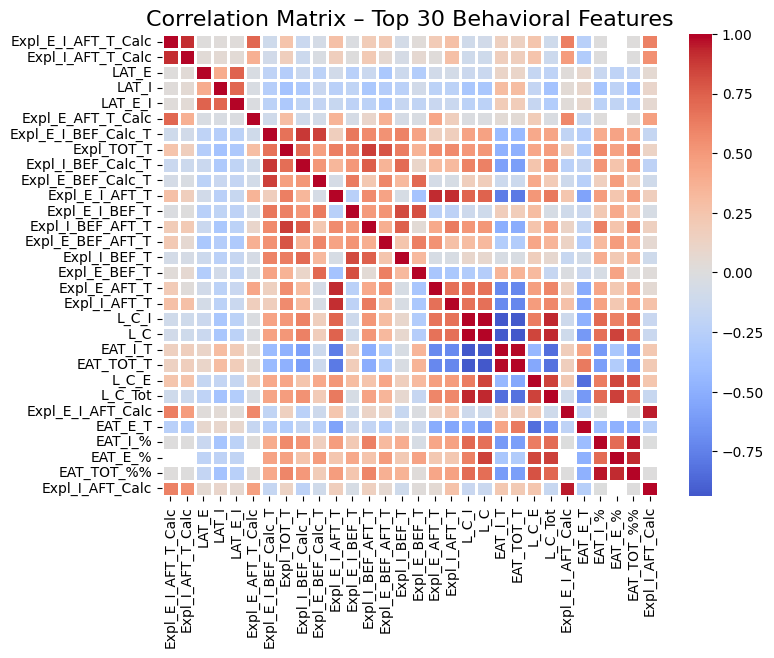

In [39]:
# Drop categorical / identifier columns that are not behavioral features
exclude_keywords = ['id', 'group', 'sex', 'trial', 'year', 'gen', 'rat', 'animal']
exclude_columns = [col for col in df.columns if any(key in col.lower() for key in exclude_keywords)]
df_filtered = df.drop(columns=exclude_columns, errors='ignore')

# Keep only numeric columns
df_numeric = df_filtered.select_dtypes(include='number')

# Drop columns with constant values or near-zero variance
df_numeric = df_numeric.loc[:, df_numeric.std() > 0.01]

# Select top 30 variables by standard deviation
top30_columns = df_numeric.std().sort_values(ascending=False).head(30).index
df_top30 = df_numeric[top30_columns]

# Plot the correlation result
plt.figure(figsize=(8, 6))
sns.heatmap(df_top30.corr(), cmap="coolwarm", center=0, annot=False, fmt=".2f", linewidths=1)
plt.title("Correlation Matrix – Top 30 Behavioral Features", fontsize=16)
# show figure
plt.show()

### Data distribution plot

In [40]:
# Drop rows with missing values in Group_Sex or Year
df_clean = df.dropna(subset=['GR_Gender', 'Year'])

# Standardize Group_Sex values to lowercase
df_clean['Group_Sex'] = df_clean['GR_Gender'].str.lower()

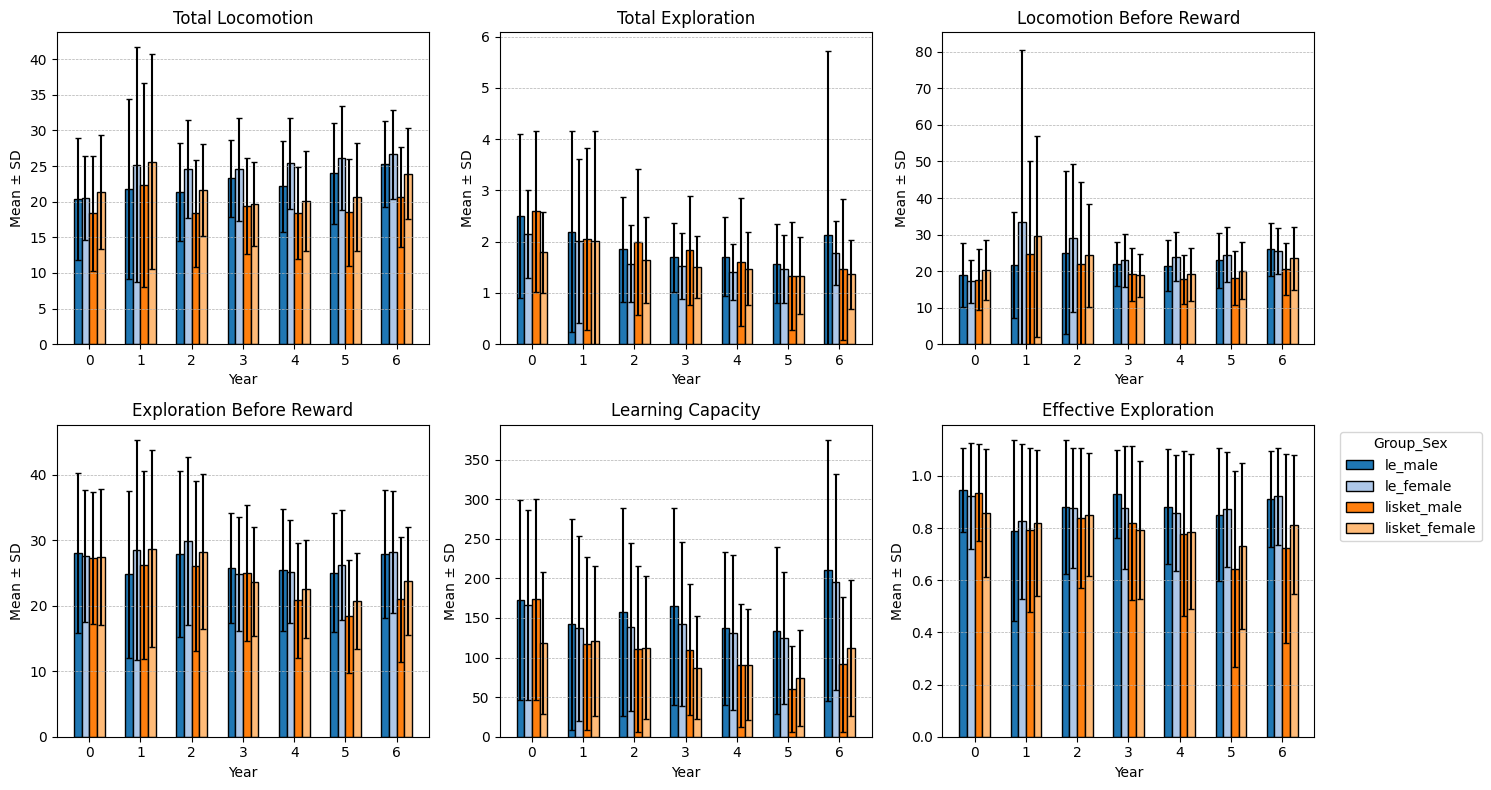

In [41]:
# Define same 6 features with new group-based color style
features = {
    'LOCO_TOT': 'Total Locomotion',
    'Expl_E_I_TOT_Loco_ratio': 'Total Exploration',
    'LOCO_BEF': 'Locomotion Before Reward',
    'Expl_E_I_BEF_Nr': 'Exploration Before Reward',
    'L_C': 'Learning Capacity',
    'E_E': 'Effective Exploration'
}

# Color palette for groups in a color version
color_palette = {
    'le_male': '#1f77b4',
    'le_female': '#aec7e8',
    'lisket_male': '#ff7f0e',
    'lisket_female': '#ffbb78'
}
plot_groups = list(color_palette.keys())

# Prepare figure
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Draw color version of 6 feature-wise plots
for ax, (feature, title) in zip(axes, features.items()):
    summary = df_clean.groupby(['Year', 'Group_Sex'])[feature].agg(['mean', 'std']).reset_index()
    years = sorted(df_clean['Year'].dropna().unique())
    width = 0.15

    for i, group in enumerate(plot_groups):
        group_data = summary[summary['Group_Sex'] == group]
        x = np.array(group_data['Year']) + (i - 1.5) * width
        ax.bar(x, group_data['mean'], width=width,
               yerr=group_data['std'], capsize=2,
               color=color_palette[group],
               edgecolor='black', label=group)
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean ± SD")
    ax.set_xticks(years)
    ax.set_xticklabels(years)
    ax.set_ylim(bottom=0)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

axes[-1].legend(title="Group_Sex", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Statistics by generations

In [42]:
# Filter out rows with missing Sex, Year, or Group
df_filtered = df.dropna(subset=["Gender", "Year", "Group"])
df_filtered = df_filtered.drop_duplicates(subset=["Year", "Generation", "Group", "Gender","NR"])

# Count animals by Year, Group, and Sex
grouped = df_filtered.groupby(["Year", "Generation", "Group", "Gender"]).size().unstack(fill_value=0)

# Rename columns to match the template
grouped = grouped.rename(columns={"male": "Nr animals Male", "female": "Nr animals Female"})

# Add total animal count
grouped["Nr animals"] = grouped["Nr animals Male"] + grouped["Nr animals Female"]

# Reset index to flatten DataFrame
summary_df = grouped.reset_index()

In [43]:
summary_df

Gender,Year,Generation,Group,Nr animals Female,Nr animals Male,Nr animals
0,0,0,LE,14,27,41
1,0,0,Lisket,15,26,41
2,1,1,LE,22,31,53
3,1,1,Lisket,18,29,47
4,1,2,LE,15,15,30
5,1,2,Lisket,27,30,57
6,1,3,LE,20,29,49
7,1,3,Lisket,20,40,60
8,2,4,LE,20,20,40
9,2,4,Lisket,20,30,50
